In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dataset = pd.read_csv(r"E:\DataSci-ML Datasets\Mall_Customers.csv")

In [3]:
dataset.shape

(200, 5)

In [4]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
X = dataset.iloc[: , [3,4]].values

In [8]:
#print(X)

In [9]:
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters= i , init= 'k-means++' , random_state= 50)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

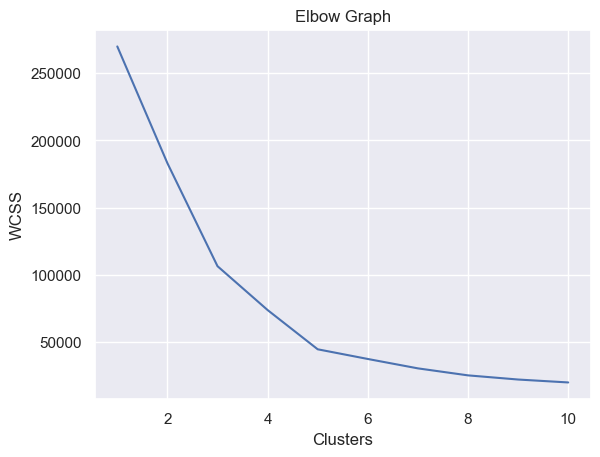

In [10]:
sns.set()
plt.plot(range(1 , 11) , wcss)
plt.title("Elbow Graph")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
kmeans = KMeans(n_clusters= 5 , init= 'k-means++' , random_state= 0)
Y = kmeans.fit_predict(X)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [12]:
print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


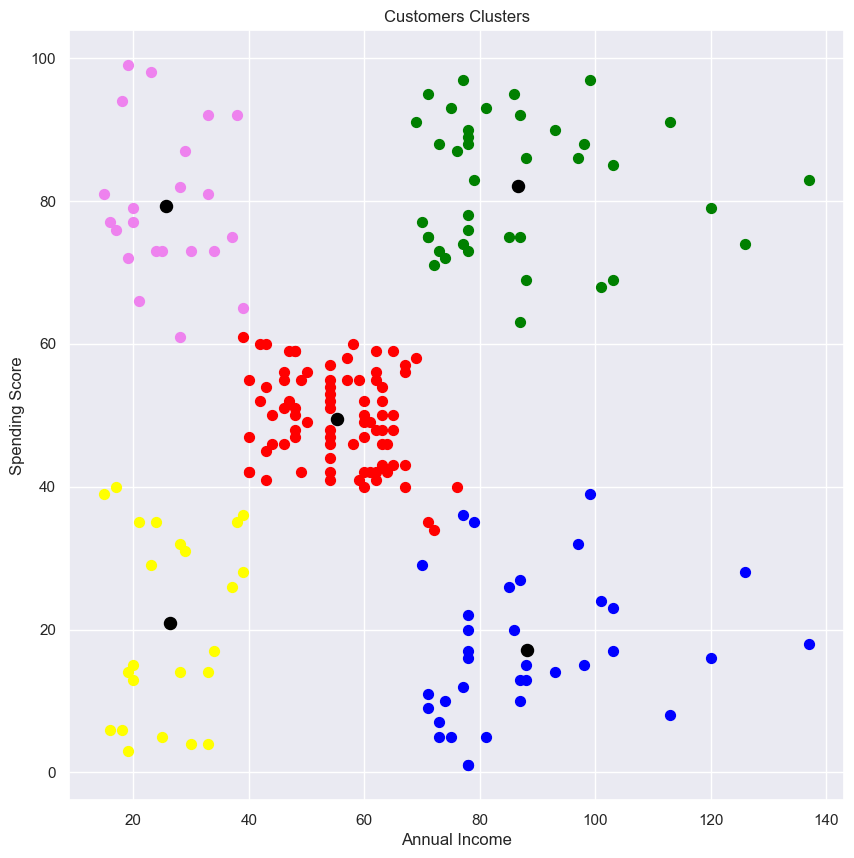

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(X[Y==0,0] , X[Y==0,1] , s= 50 , c= 'red')
plt.scatter(X[Y==1,0] , X[Y==1,1] , s= 50 , c= 'green')
plt.scatter(X[Y==2,0] , X[Y==2,1] , s= 50 , c= 'blue')
plt.scatter(X[Y==3,0] , X[Y==3,1] , s= 50 , c= 'yellow')
plt.scatter(X[Y==4,0] , X[Y==4,1] , s= 50 , c= 'violet')

plt.scatter(kmeans.cluster_centers_[: , 0] , kmeans.cluster_centers_[: , 1] , s= 75 , c= 'black')

plt.title("Customers Clusters")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()